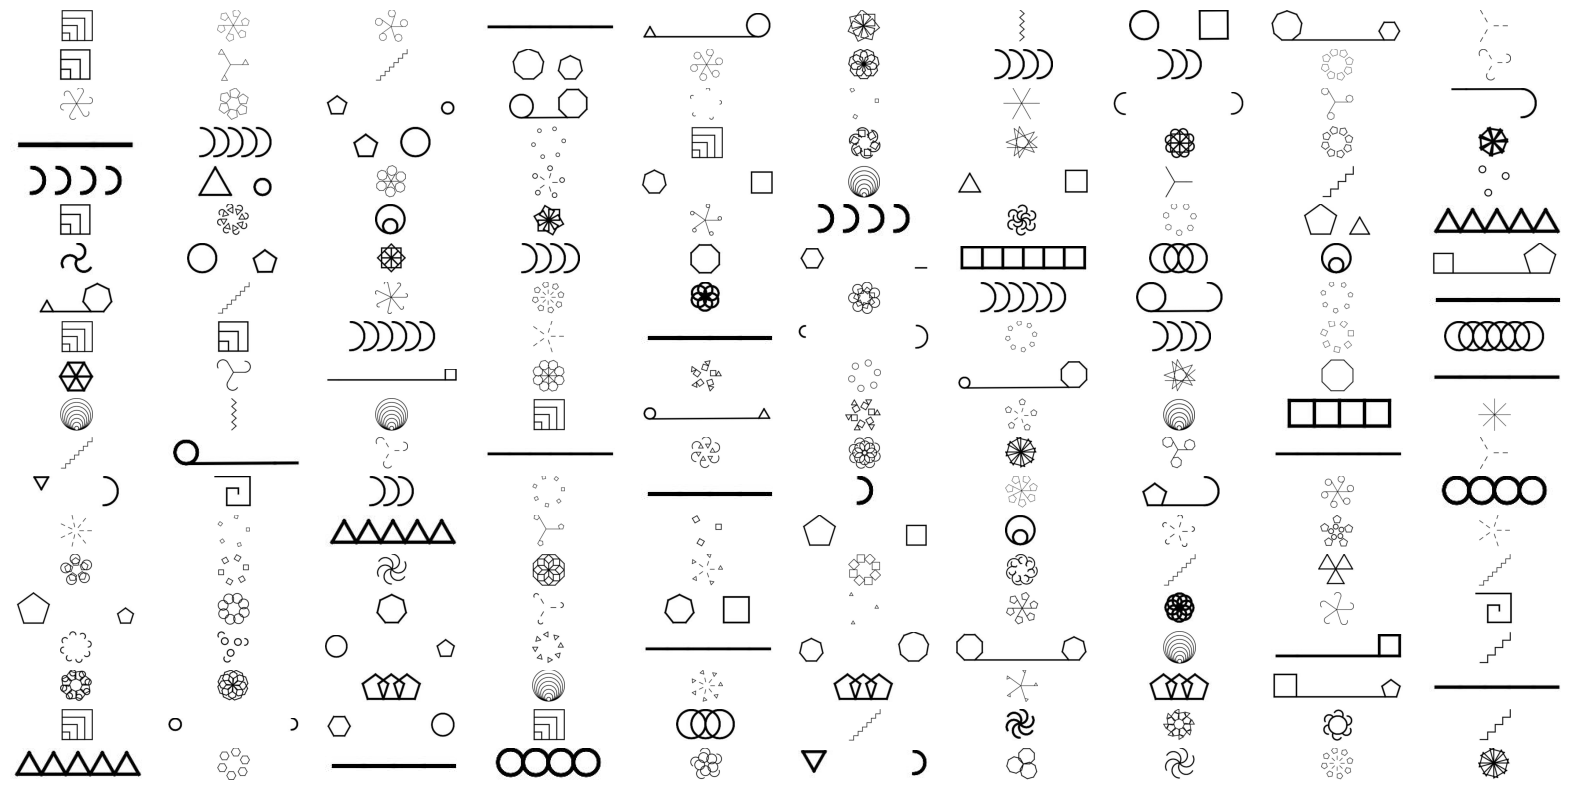

In [45]:
## test images
import matplotlib.pyplot as plt
import re
import glob
from PIL import Image
import numpy as np

def crop_image(image):
    # Convert to grayscale and create a binary mask where white pixels are 1
    image_gray = image.convert("L")
    image_np = np.array(image_gray)
    mask = image_np < 255  # Create a mask where the image is not white

    # Find the bounding box of the non-white pixels
    coords = np.argwhere(mask)
    if coords.size == 0:  # If there's no non-white content, return the original image
        return image
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1  # slices are exclusive at the top

    # Crop the image to the bounding box
    cropped_image = image.crop((y0, x0, y1, x1))
    return cropped_image

def visualize_images():
    path = '/ceph/tsesterh/abstraction/regal_program_learning/out/train/'
    pattern = r'logo_(\d+)_.*\.jpg'

    files = glob.glob(f'{path}logo_*.jpg')
    sorted_files = sorted(files, key=lambda x: int(re.search(pattern, x).group(1)))

    fig = plt.figure(figsize=(20, 10))

    for i, file in enumerate(sorted_files[:200]):
        img = Image.open(file)
        cropped_img = crop_image(img)
        
        ax = fig.add_subplot(20, 10, i + 1)
        ax.imshow(cropped_img)
        ax.axis('off')

    plt.show()

# Call the function to visualize the images
visualize_images()

111it [00:15,  7.28it/s]


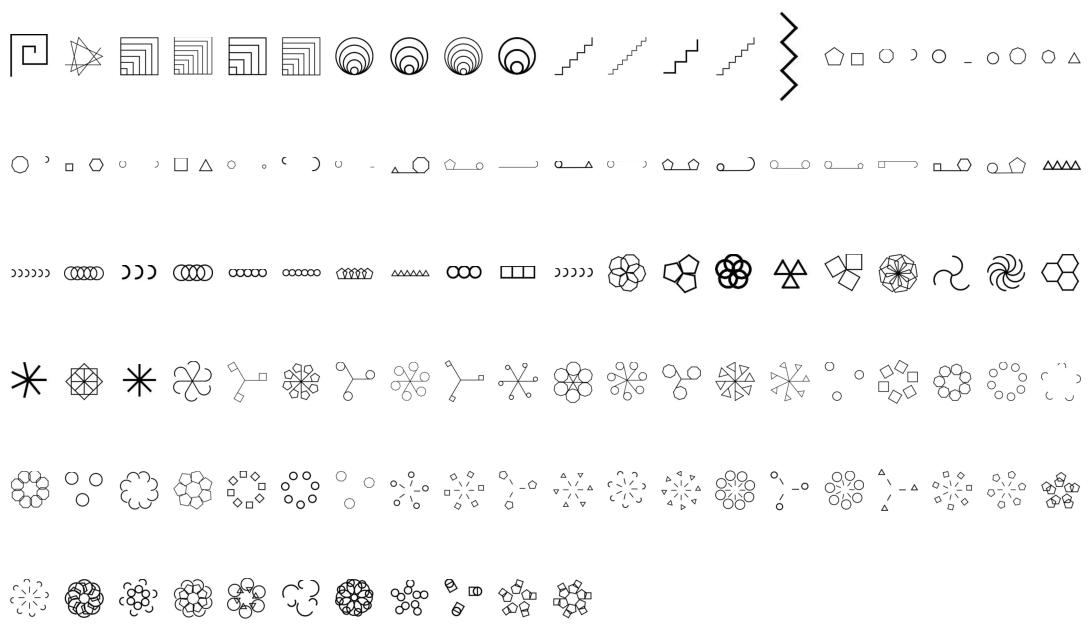

In [46]:
import matplotlib.pyplot as plt
import re
import glob
from PIL import Image
import numpy as np
from tqdm import tqdm

def crop_image(image):
    # Convert to grayscale and create a binary mask where white pixels are 1
    image_gray = image.convert("L")
    image_np = np.array(image_gray)
    mask = image_np < 255  # Create a mask where the image is not white

    # Find the bounding box of the non-white pixels
    coords = np.argwhere(mask)
    if coords.size == 0:  # If there's no non-white content, return the original image
        return image
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1  # slices are exclusive at the top

    # Crop the image to the bounding box
    cropped_image = image.crop((y0, x0, y1, x1))
    return cropped_image

def visualize_images():
    path = '/ceph/tsesterh/abstraction/regal_program_learning/out/test/'
    pattern = r'logo_(\d+)_.*\.jpg'

    files = glob.glob(f'{path}logo_*.jpg')
    sorted_files = sorted(files, key=lambda x: int(re.search(pattern, x).group(1)))

    num_images = len(sorted_files[:200])  # Adjust this if you want to display more or fewer images
    grid_rows = 10
    grid_cols = 20

    fig = plt.figure(figsize=(11, 11))  # Adjust the figsize based on grid size

    for i, file in tqdm(enumerate(sorted_files[:grid_rows * grid_cols])):
        img = Image.open(file)
        cropped_img = crop_image(img)
        
        ax = fig.add_subplot(grid_rows, grid_cols, i + 1)
        ax.imshow(cropped_img)
        ax.axis('off')

    plt.tight_layout()  # Ensure no overlapping of subplots
    plt.show()

# Call the function to visualize the images
visualize_images()

200it [00:22,  8.74it/s]


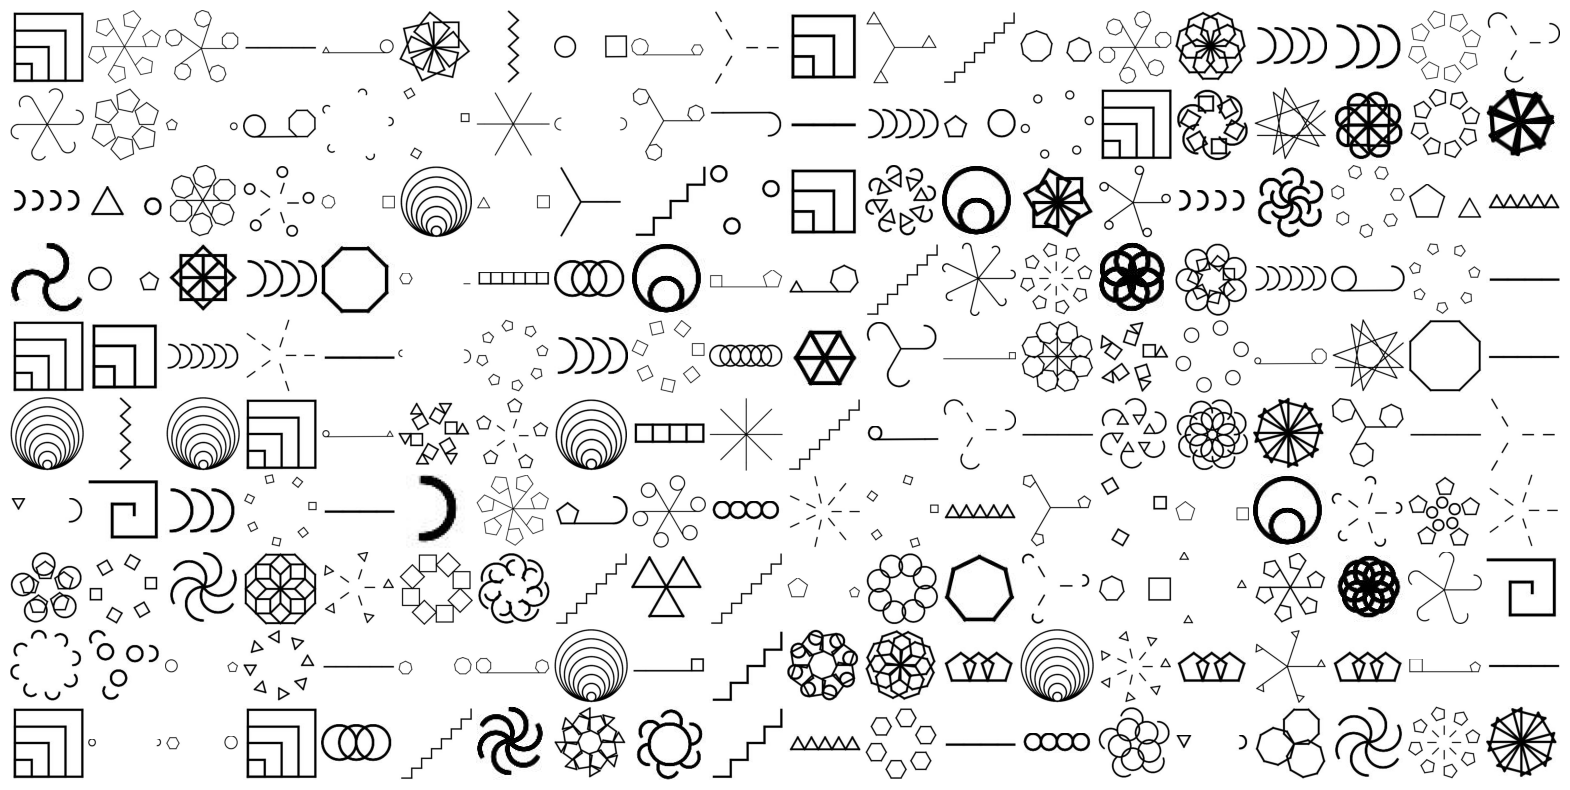

In [5]:
import matplotlib.pyplot as plt
import re
import glob
from PIL import Image
import numpy as np
from tqdm import tqdm

def crop_image(image):
    # Convert to grayscale and create a binary mask where white pixels are 1
    image_gray = image.convert("L")
    image_np = np.array(image_gray)
    mask = image_np < 255  # Create a mask where the image is not white

    # Find the bounding box of the non-white pixels
    coords = np.argwhere(mask)
    if coords.size == 0:  # If there's no non-white content, return the original image
        return image
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1  # slices are exclusive at the top

    # Crop the image to the bounding box
    cropped_image = image.crop((y0, x0, y1, x1))
    return cropped_image

def visualize_images():
    path = '/ceph/tsesterh/abstraction/regal_program_learning/out/train/'
    pattern = r'logo_(\d+)_.*\.jpg'

    files = glob.glob(f'{path}logo_*.jpg')
    sorted_files = sorted(files, key=lambda x: int(re.search(pattern, x).group(1)))

    num_images = len(sorted_files[:200])  # Adjust this if you want to display more or fewer images
    grid_rows = 10
    grid_cols = 20

    fig = plt.figure(figsize=(20, 10))  # Adjust the figsize based on grid size

    for i, file in tqdm(enumerate(sorted_files[:grid_rows * grid_cols])):
        img = Image.open(file)
        cropped_img = crop_image(img)
        
        ax = fig.add_subplot(grid_rows, grid_cols, i + 1)
        ax.imshow(cropped_img)
        ax.axis('off')
        
        # Add grid lines to each subplot
        ax.set_xticks([])  # Remove default ticks
        ax.set_yticks([])  # Remove default ticks
        ax.grid(True, color='black', linestyle='-', linewidth=1)  # Add grid lines

    # Adjust spacing to make the gridlines clearer
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

    plt.show()

# Call the function to visualize the images with gridlines
visualize_images()

200it [00:00, 372.36it/s]


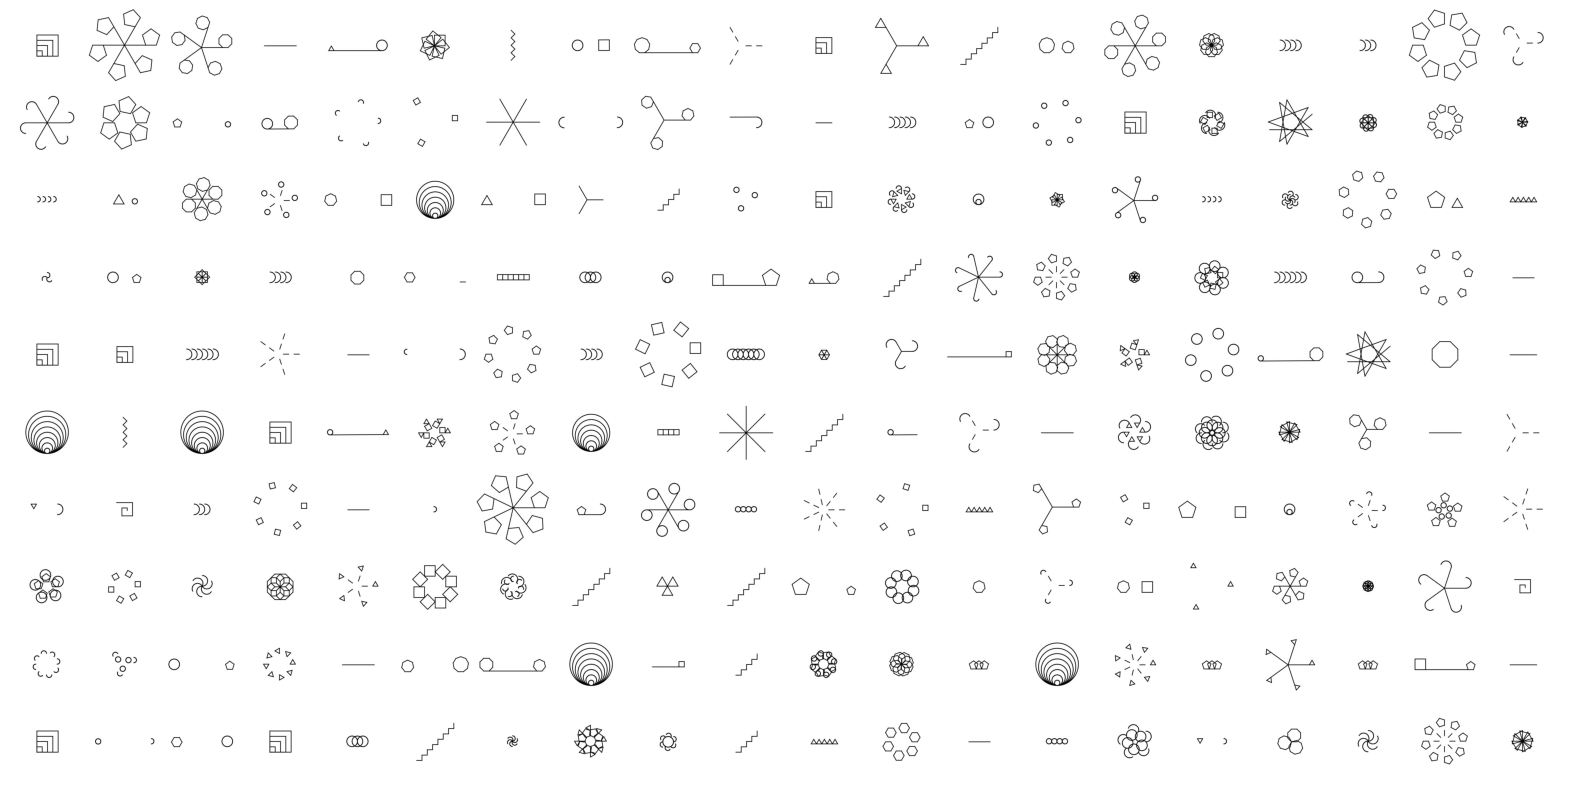

In [8]:
import matplotlib.pyplot as plt
import re
import glob
from PIL import Image, ImageOps
import numpy as np
from tqdm import tqdm

def crop_image(image):
    # Convert to grayscale and create a binary mask where white pixels are 1
    image_gray = image.convert("L")
    image_np = np.array(image_gray)
    mask = image_np < 255  # Create a mask where the image is not white

    # Find the bounding box of the non-white pixels
    coords = np.argwhere(mask)
    if coords.size == 0:  # If there's no non-white content, return the original image
        return image
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1  # slices are exclusive at the top

    # Crop the image to the bounding box
    cropped_image = image.crop((y0, x0, y1, x1))
    return cropped_image

def get_max_dimensions(images):
    max_width = 0
    max_height = 0
    for image in images:
        width, height = image.size
        if width > max_width:
            max_width = width
        if height > max_height:
            max_height = height
    return max_width, max_height

def pad_image_to_size(image, target_size):
    # Calculate padding amounts to make the image the target size
    delta_width = target_size[0] - image.size[0]
    delta_height = target_size[1] - image.size[1]
    padding = (delta_width // 2, delta_height // 2, delta_width - (delta_width // 2), delta_height - (delta_height // 2))
    
    # Pad the image with white (255) pixels
    padded_image = ImageOps.expand(image, padding, fill='white')
    return padded_image

def visualize_images():
    path = '/ceph/tsesterh/abstraction/regal_program_learning/out/train/'
    pattern = r'logo_(\d+)_.*\.jpg'

    files = glob.glob(f'{path}logo_*.jpg')
    sorted_files = sorted(files, key=lambda x: int(re.search(pattern, x).group(1)))

    # First pass: Crop images and determine the maximum size
    cropped_images = []
    for file in sorted_files[:200]:
        img = Image.open(file)
        cropped_img = crop_image(img)
        cropped_images.append(cropped_img)

    # Determine maximum width and height of cropped images
    max_width, max_height = get_max_dimensions(cropped_images)

    # Second pass: Resize all cropped images to have the same size
    resized_images = [pad_image_to_size(img, (max_width, max_height)) for img in cropped_images]

    # Visualize the images in a grid
    grid_rows = 10
    grid_cols = 20
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(20, 10))  # Create subplots

    for i, (ax, img) in tqdm(enumerate(zip(axes.flat, resized_images[:grid_rows * grid_cols]))):
        ax.imshow(img)
        ax.axis('off')  # Turn off axis

    plt.subplots_adjust(wspace=0.05, hspace=0.05)  # Adjust spacing to make sure there's a clean layout
    plt.show()

# Call the function to visualize the images without gridlines
visualize_images()

In [5]:
import re
import glob
from PIL import Image, ImageOps
import os

def crop_image(image):
    image_gray = image.convert("L")
    image_np = np.array(image_gray)
    mask = image_np < 255  # Create a mask where the image is not white
    coords = np.argwhere(mask)
    if coords.size == 0:
        return image
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1  # slices are exclusive at the top
    cropped_image = image.crop((y0, x0, y1, x1))
    return cropped_image

def resize_image(image, size=(100, 100)):
    return image.resize(size, Image.LANCZOS)

def save_images_with_html():
    path = '/ceph/tsesterh/abstraction/regal_program_learning/out/train/'
    pattern = r'logo_(\d+)_(.*)\.jpg'  # Updated to capture the image description

    files = glob.glob(f'{path}logo_*.jpg')
    sorted_files = sorted(files, key=lambda x: int(re.search(pattern, x).group(1)))

    cropped_images = []
    descriptions = []
    image_filenames = []

    # Create output directory for thumbnails
    output_dir = "output_thumbnails"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, file in enumerate(sorted_files[:200]):
        img = Image.open(file)
        cropped_img = crop_image(img)
        resized_img = resize_image(cropped_img)

        # Save resized image as thumbnail
        thumbnail_filename = f"{output_dir}/image_{i}.jpg"
        resized_img.save(thumbnail_filename)
        image_filenames.append(thumbnail_filename)

        # Extract description from filename
        match = re.search(pattern, file)
        if match:
            description = match.group(2)
            descriptions.append(description)

    # Generate HTML for displaying images with hover descriptions
    html_content = '<html>\n<head>\n<style>\n'
    html_content += '''
    .grid-container {
        display: grid;
        grid-template-columns: repeat(auto-fill, minmax(120px, 1fr));
        gap: 10px;
    }
    .grid-item {
        position: relative;
        text-align: center;
    }
    .grid-item img {
        width: 100px;
        height: 100px;
        object-fit: cover;
    }
    .tooltip {
        visibility: hidden;
        background-color: black;
        color: #fff;
        text-align: center;
        border-radius: 5px;
        padding: 5px;
        position: absolute;
        z-index: 1;
        bottom: 125%; /* Position the tooltip above the image */
        left: 50%;
        margin-left: -60px;
        opacity: 0;
        transition: opacity 0.3s;
    }
    .grid-item:hover .tooltip {
        visibility: visible;
        opacity: 1;
    }
    </style>\n</head>\n<body>\n'
    '''
    html_content += '<div class="grid-container">\n'
    
    # Add each image to the HTML grid
    for i, filename in enumerate(image_filenames):
        html_content += f'''
        <div class="grid-item">
            <img src="{filename}" alt="Image {i}">
            <div class="tooltip">{descriptions[i]}</div>
        </div>\n'''
    
    html_content += '</div>\n</body>\n</html>'

    # Save the HTML file
    with open("image_grid.html", "w") as html_file:
        html_file.write(html_content)

    print("HTML file with image grid and hover descriptions created successfully.")

# Run the function to prepare images and generate HTML
save_images_with_html()

HTML file with image grid and hover descriptions created successfully.


In [8]:
import re
import glob
import os
from PIL import Image, ImageOps
from IPython.core.display import display, HTML

def crop_image(image):
    image_gray = image.convert("L")
    image_np = np.array(image_gray)
    mask = image_np < 255  # Create a mask where the image is not white
    coords = np.argwhere(mask)
    if coords.size == 0:
        return image
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1  # slices are exclusive at the top
    cropped_image = image.crop((y0, x0, y1, x1))
    return cropped_image

def resize_image(image, size=(100, 100)):
    return image.resize(size, Image.LANCZOS)

def save_images_with_html():
    path = '/ceph/tsesterh/abstraction/regal_program_learning/out/train/'
    pattern = r'logo_(\d+)_(.*)\.jpg'  # Pattern to capture the image description

    # Get all image files
    files = glob.glob(f'{path}logo_*.jpg')
    sorted_files = sorted(files, key=lambda x: int(re.search(pattern, x).group(1)))

    cropped_images = []
    descriptions = []
    image_filenames = []

    # Create output directory for thumbnails
    output_dir = "output_thumbnails"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, file in enumerate(sorted_files[:200]):  # Process only 200 images
        img = Image.open(file)
        cropped_img = crop_image(img)
        resized_img = resize_image(cropped_img)

        # Save resized image as thumbnail
        thumbnail_filename = f"{output_dir}/image_{i}.jpg"
        resized_img.save(thumbnail_filename)
        image_filenames.append(thumbnail_filename)

        # Extract description from filename
        match = re.search(pattern, file)
        if match:
            description = match.group(2)
            descriptions.append(description)

    # Generate HTML content
    html_content = '''
    <style>
        .grid-container {
            display: grid;
            grid-template-columns: repeat(auto-fill, minmax(120px, 1fr));
            gap: 10px;
        }
        .grid-item {
            position: relative;
            text-align: center;
        }
        .grid-item img {
            width: 100px;
            height: 100px;
            object-fit: cover;
        }
        .tooltip {
            visibility: hidden;
            background-color: black;
            color: #fff;
            text-align: center;
            border-radius: 5px;
            padding: 5px;
            position: absolute;
            z-index: 1;
            bottom: 125%; /* Position the tooltip above the image */
            left: 50%;
            margin-left: -60px;
            opacity: 0;
            transition: opacity 0.3s;
        }
        .grid-item:hover .tooltip {
            visibility: visible;
            opacity: 1;
        }
    </style>
    <div class="grid-container">
    '''

    # Add each image with its tooltip description
    for i, filename in enumerate(image_filenames):
        html_content += f'''
            <div class="grid-item">
                <img src="{filename}" alt="Image {i}">
                <div class="tooltip">{descriptions[i]}</div>
            </div>
        '''

    # Close HTML tags
    html_content += '</div>'

    # Display HTML in Jupyter notebook
    display(HTML(html_content))

# Run the function to prepare images and display HTML in Jupyter
save_images_with_html()

/tmp/ipykernel_3222243/3005166134.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [19]:
import re
import glob
import pandas as pd

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width (if column contains long strings)

def extract_descriptions(path):
    pattern = r'logo_(\d+)_(.*)\.jpg'  # Pattern to capture the image description

    files = glob.glob(f'{path}logo_*.jpg')  # Get all the image files
    descriptions = []  # List to store descriptions

    for file in files:
        match = re.search(pattern, file)  # Extract the description from the filename
        if match:
            description = match.group(2)  # The second group captures the description
            descriptions.append(description)
    
    return descriptions

def count_description_occurrences(descriptions):
    # Convert list of descriptions into a pandas DataFrame
    df = pd.DataFrame(descriptions, columns=['Description'])

    # Count the occurrences of each unique description
    description_counts = df['Description'].value_counts()

    return description_counts

path = '/ceph/tsesterh/abstraction/regal_program_learning/out/'  # Path to the image files

# Extract descriptions from filenames
descriptions = extract_descriptions(path)

df = pd.DataFrame(descriptions, columns=['Description'])

# Count the occurrences of each unique description
description_counts = df['Description'].value_counts()
# Count how often each description appears

# Display the result
print(description_counts[:5])


Description
5_sided_snowflake_with_a_short_space_and_a_short_line_and_a_short_space_and_a_medium_semicircle_as_arms    3
8_sided_snowflake_with_a_short_space_and_a_short_line_and_a_short_space_and_a_short_line_as_arms           2
8_sided_snowflake_with_a_short_space_and_a_short_line_and_a_short_space_and_a_small_semicircle_as_arms     2
8_sided_snowflake_with_a_medium_semicircle_and_a_small_square_as_arms                                      1
a_medium_circle_connected_by_a_medium_line_to_a_short_line                                                 1
Name: count, dtype: int64


In [20]:
#get number of duplicates in df
duplicates = df[df.duplicated()]

print(f"Number of duplicates: {len(duplicates)}")

Number of duplicates: 4


In [21]:
import json

def check_duplicates(file_path):
    seen_entries = set()  # Set to track unique entries
    duplicates = []  # List to store duplicates

    # Open the file and read line by line
    with open(file_path, 'r') as f:
        for line in f:
            entry = json.loads(line)  # Load the JSON line as a Python dictionary

            # Use a tuple of 'program' and 'language' fields as a unique key
            entry_key = (entry["program"], tuple(entry["language"]))

            # Check if the entry is a duplicate
            if entry_key in seen_entries:
                duplicates.append(entry)
            else:
                seen_entries.add(entry_key)
    
    return duplicates

# Main function to run the duplicate check
file_path = '/ceph/tsesterh/abstraction/regal_program_learning/logo_data/python/train_200.jsonl'  # Path to your JSONL file
duplicates = check_duplicates(file_path)

# Display duplicates if found
if duplicates:
    print(f"Found {len(duplicates)} duplicates:")
    for dup in duplicates:
        print(json.dumps(dup, indent=2))
else:
    print("No duplicates found.")


Found 47 duplicates:
{
  "program": "for i in range(5):\n    embed(\"\"\"for j in range(4):\n    forward(2*i)\n    left(90.0)\"\"\", locals())",
  "language": [
    "4 concentric square s"
  ]
}
{
  "program": "for i in range(4):\n    embed(\"\"\"for j in range(4):\n    forward(2*i)\n    left(90.0)\"\"\", locals())",
  "language": [
    "3 concentric square s"
  ]
}
{
  "program": "for j in range(4):\n    embed(\"\"\"for i in range(HALF_INF):\n    forward(EPS_DIST*1)\n    left(EPS_ANGLE)\"\"\", locals())\n    penup()\n    forward(2)\n    left(0.0)\n\n    pendown()",
  "language": [
    "4 small semicircle s in a row"
  ]
}
{
  "program": "for j in range(4):\n    embed(\"\"\"for i in range(HALF_INF):\n    forward(EPS_DIST*2)\n    left(EPS_ANGLE)\"\"\", locals())\n    penup()\n    forward(2)\n    left(0.0)\n\n    pendown()",
  "language": [
    "4 medium semicircle s in a row"
  ]
}
{
  "program": "for j in range(3):\n    for i in range(HALF_INF):\n        forward(EPS_DIST*j)\n        le

In [40]:
import json

def check_duplicates(file_path):
    seen_entries = set()  # Set to track unique entries
    duplicates = set()  # Set to store unique duplicate language descriptions
    no_of_duplicates = 0
    # Open the file and read line by line
    with open(file_path, 'r') as f:
        for line in f:
            entry = json.loads(line)  # Load the JSON line as a Python dictionary

            # Use a tuple of 'program' and 'language' fields as a unique key
            entry_key = (entry["program"], tuple(entry["language"]))

            # Check if the entry is a duplicate
            if entry_key in seen_entries:
                duplicates.add(tuple(entry["language"]))  # Store only the language description tuple
                no_of_duplicates += 1
            else:
                seen_entries.add(entry_key)

    print(f"Number of duplicates: {no_of_duplicates}")
    
    return duplicates

# Main function to run the duplicate check
file_path = '/ceph/tsesterh/abstraction/regal_program_learning/logo_data/python/dev_100.jsonl'  # Path to your JSONL file
#file_path = '/ceph/tsesterh/abstraction/regal_program_learning/python_data/date/gpt-3.5-turbo_NL+SL/train_data.jsonl'  # Path to your JSONL file

duplicates = check_duplicates(file_path)

# Display duplicates if found
if duplicates:
    print(f"Found {len(duplicates)} duplicated tasks with the following descriptions:")
    for dup in duplicates:
        print(dup)
else:
    print("No duplicates found.")


Number of duplicates: 4
Found 3 duplicated tasks with the following descriptions:
('8 sided snowflake with a short space and a short line and a short space and a small semicircle as arms',)
('8 sided snowflake with a short space and a short line and a short space and a short line as arms',)
('5 sided snowflake with a short space and a short line and a short space and a medium semicircle as arms',)


In [43]:
import json

def extract_entries(file_path):
    entries = set()  # Use a set to store unique entries

    with open(file_path, 'r') as f:
        for line in f:
            entry = json.loads(line)  # Load the JSON line as a Python dictionary

            # Use 'program' and 'language' fields to create a unique key for each task
            entry_key = entry["language"][0] #(entry["program"], tuple(entry["language"]))
            entries.add(entry_key)  # Add the unique key to the set

    return entries

def check_train_test_duplicates(train_file, test_file):
    # Extract tasks from both train and test files
    train_entries = extract_entries(train_file)
    test_entries = extract_entries(test_file)

    duplicates = set()  # Set to store unique duplicated language descriptions

    # Compare test tasks to train tasks
    for entry in test_entries:
        if entry in train_entries:  # If the test task is found in the train set
            duplicates.add(entry)  # Add the language description as a tuple

    return duplicates

# Main function to check for duplicates between train and test files
train_file = '/ceph/tsesterh/abstraction/regal_program_learning/logo_data/python/train_200.jsonl'  # Path to the train JSONL file
test_file = '/ceph/tsesterh/abstraction/regal_program_learning/logo_data/python/dev_100.jsonl' # Path to the test JSONL file

# Check for duplicates between the train and test files
duplicates = check_train_test_duplicates(train_file, test_file)

# Display duplicated tasks' descriptions if found
if duplicates:
    print(f"Found {len(duplicates)} duplicated tasks between train and test:")
    for dup in duplicates:
        print(dup)
else:
    print("No duplicates found between train and test.")


No duplicates found between train and test.


## Date

In [37]:
import json

def check_duplicates(file_path):
    seen_entries = set()  # Set to track unique entries
    duplicates = set()  # Set to store unique duplicate language descriptions
    no_of_dups = 0
    # Open the file and read line by line
    with open(file_path, 'r') as f:
        for line in f:
            entry = json.loads(line)  # Load the JSON line as a Python dictionary

            # Use a tuple of 'program' and 'language' fields as a unique key
            entry_key = entry["question"]#(entry["program"], tuple(entry["language"]))

            # Check if the entry is a duplicate
            if entry_key in seen_entries:
                duplicates.add((entry["question"]))  # Store only the language description tuple
                no_of_dups += 1
            else:
                seen_entries.add(entry_key)
    
    print("Number of duplicates: ", no_of_dups)
    return duplicates

# Main function to run the duplicate check
file_path = '/ceph/tsesterh/abstraction/regal_program_learning/python_data/date/gpt-3.5-turbo_NL+SL/dev.jsonl'  # Path to your JSONL file

duplicates = check_duplicates(file_path)

# Display duplicates if found
if duplicates:
    print(f"Found {len(duplicates)} duplicated tasks with the following descriptions:")
    for dup in duplicates:
        print(dup)
else:
    print("No duplicates found.")


Number of duplicates:  10
Found 10 duplicated tasks with the following descriptions:
Today is 9/7. Jane is watching NFL 2003. What is the date today in MM/DD/YYYY?
Yesterday was 12/31/1929. Today could not be 12/32/1929 because December has only 31 days. What is the date one week ago from today in MM/DD/YYYY?
Jane is celebrating the last day of Jan 2012. What is the date one week ago from today in MM/DD/YYYY?
Yesterday was 12/31/1929. Today could not be 12/32/1929 because December has only 31 days. What is the date a month ago in MM/DD/YYYY?
Today is the last day of the first quarter of 2008. What is the date yesterday in MM/DD/YYYY?
Today is 9/7. Jane is watching NFL 2003. What is the date a month ago in MM/DD/YYYY?
Jane is celebrating the last day of Jan 2012. What is the date tomorrow in MM/DD/YYYY?
Today's meeting is rescheduled to 11 am tomorrow, 10/16/1924. What is the date one year ago from today in MM/DD/YYYY?
Jane and John married on Jan 2, 1958. It is their 5-year anniversary